In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as sm
NHL_R_Stats=pd.read_csv('../Assignment 2/Data/NHL_Team_R_Stats(Editted).csv')#Replace with path of your csv file


In [277]:

display(NHL_R_Stats)

,goals_for,win_pct
0,227,0.551282
1,223,0.417722
2,250,0.560976
3,251,0.524390
4,239,0.487805
5,221,0.407407
6,250,0.500000
7,246,0.525641
8,218,0.354430
9,237,0.518519


In [278]:
print(NHL_R_Stats.dtypes)


goals_for      int64
win_pct      float64
dtype: object


In [279]:
NHL_R_Stats.shape

(30, 2)

In [280]:
x=[
[227,
223,
250,
251,
239,
221,
250,
246,
218,
237,
255,
194,
198,
223,
208,
213,
172,
215,
231,
233,
188,
252,
230,
242,
245,
237,
245,
223,
263,
219
]]
x=np.array(x)
x=x.T
y=[[0.551282051,
0.417721519,
0.56097561,
0.524390244,
0.487804878,
0.407407407,
0.5,
0.525641026,
0.35443038,
0.518518519,
0.5625,
0.3125,
0.37037037,
0.567901235,
0.475,
0.544303797,
0.4625,
0.5375,
0.358024691,
0.5375,
0.382716049,
0.571428571,
0.53164557,
0.592592593,
0.567901235,
0.441558442,
0.530864198,
0.43902439,
0.65,
0.555555556
]]
y=np.array(y)
y=y.T



<!-- class Linear_Regression():: This line defines a new class named Linear_Regression.
def __init__(self, learning_rate, no_of_itr):: This is a special method called the constructor or initializer. It is called when a new instance of the class is created.
self: Represents the instance of the class.
learning_rate: Parameter to set the learning rate for gradient descent.
no_of_itr: Parameter to set the number of iterations for gradient descent. -->

In [281]:
class Linear_Regression():
    def __init__(self, learning_rate, no_of_itr): 
        self.learning_rate = learning_rate 
        self.no_of_itr = no_of_itr 

    def fit(self, x, y):
        self.m, self.n = x.shape
        self.w = np.zeros((self.n, 1)) 
        self.b = 0
        
        self.x = x
        self.y = y

        for i in range(self.no_of_itr):
            self.update_weights()

    def update_weights(self):
        y_prediction = self.predict(self.x)
        error = y_prediction - self.y
        dw = np.dot(self.x.T, error) / self.m
        db = np.sum(error) / self.m
        
        max_gradient = 1.0
        dw = np.clip(dw, -max_gradient, max_gradient)
        db = np.clip(db, -max_gradient, max_gradient)
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, x):
        return x.dot(self.w) + self.b

    def return_weights(self):
        print("Weights:", self.w)
        print("Bias:", self.b)

In [282]:
x_train = x[:24]
y_train = y[:24]
print("x_train values:", x_train)
print("y_train values:", y_train)



x_train values: [[227]
 [223]
 [250]
 [251]
 [239]
 [221]
 [250]
 [246]
 [218]
 [237]
 [255]
 [194]
 [198]
 [223]
 [208]
 [213]
 [172]
 [215]
 [231]
 [233]
 [188]
 [252]
 [230]
 [242]]
y_train values: [[0.55128205]
 [0.41772152]
 [0.56097561]
 [0.52439024]
 [0.48780488]
 [0.40740741]
 [0.5       ]
 [0.52564103]
 [0.35443038]
 [0.51851852]
 [0.5625    ]
 [0.3125    ]
 [0.37037037]
 [0.56790124]
 [0.475     ]
 [0.5443038 ]
 [0.4625    ]
 [0.5375    ]
 [0.35802469]
 [0.5375    ]
 [0.38271605]
 [0.57142857]
 [0.53164557]
 [0.59259259]]


In [283]:
model = Linear_Regression(learning_rate=0.0001, no_of_itr=2000)
model.fit(x_train, y_train)
model.return_weights()

Weights: [[0.0022]]
Bias: 0.0005250219979174524


In [311]:
x_predict=[257,233,256,277,300,345,220,128,350]
y_predict=[]
predic_val=[[]]
for i in x_predict:
    y_val=((i*0.0022+0.000525))
    y_predict.append(y_val)
    print("Predicted value for " ,i, " is : " , y_val)
    predic_val.append([i,y_val])
print(predic_val)


Predicted value for  257  is :  0.565925
Predicted value for  233  is :  0.513125
Predicted value for  256  is :  0.563725
Predicted value for  277  is :  0.609925
Predicted value for  300  is :  0.660525
Predicted value for  345  is :  0.759525
Predicted value for  220  is :  0.48452500000000004
Predicted value for  128  is :  0.282125
Predicted value for  350  is :  0.770525
[[], [257, 0.565925], [233, 0.513125], [256, 0.563725], [277, 0.609925], [300, 0.660525], [345, 0.759525], [220, 0.48452500000000004], [128, 0.282125], [350, 0.770525]]


Text(29.000000000000007, 0.5, 'Winning percentage')

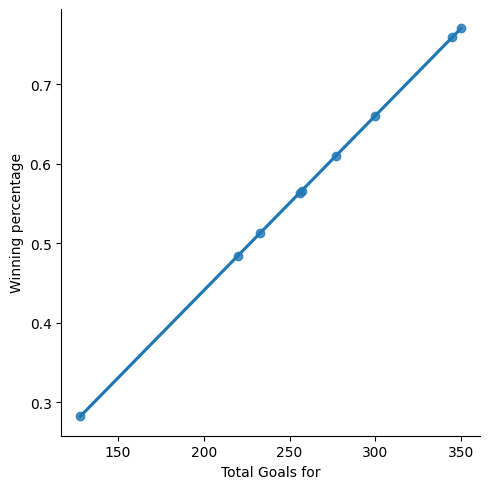

In [312]:
df = pd.DataFrame(predic_val, columns=['Total Goals for', 'Winning percentage'])
sns.lmplot(x='Total Goals for', y='Winning percentage', data=df)
plt.xlabel("Total Goals for")
plt.ylabel("Winning percentage")